Step 1 – Import Libraries

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve


Step 2 – Load Dataset

In [156]:
data= pd.read_csv('diabetes.csv')

In [159]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Step 3 – Data Selection

In [162]:
cols_to_impute = ["Insulin", "SkinThickness", "BloodPressure"]
for col in cols_to_impute:
    data[col].replace(0, data[col].median(), inplace=True)

In [163]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [164]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Step 4 – Data Splitting

In [238]:
important_cols=['Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=data[important_cols]
y=data['Outcome']

In [357]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=44,shuffle=True)


Step 6 – Model Selection and Training

In [358]:
model = LogisticRegression(penalty='l2',C=.01)
model.fit(X_train, y_train)


LogisticRegression(C=0.01)

In [359]:
y_pred = model.predict(X_test)


Step 7 – Model Evaluation

In [360]:
accuracy_score(y_test, y_pred)

0.8138528138528138

In [361]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       141
           1       0.91      0.58      0.71        90

    accuracy                           0.81       231
   macro avg       0.85      0.77      0.79       231
weighted avg       0.83      0.81      0.80       231



In [362]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[136   5]
 [ 38  52]]


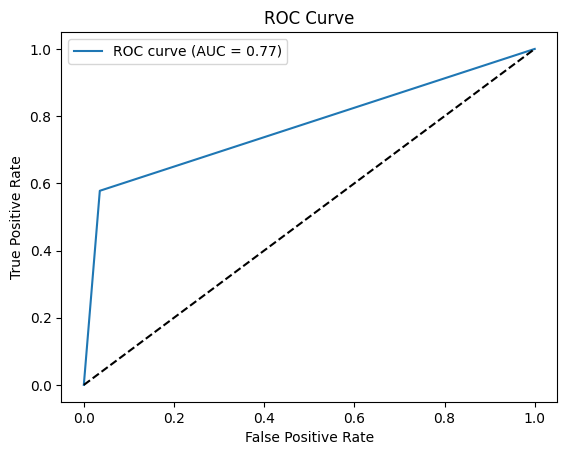

In [363]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Customer Churn Prediction

Step 1 – Import Libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


Step 2 – Load Dataset

In [3]:
dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Step 3 – Data Cleaning

In [4]:
dataset=dataset.drop(["customerID"], axis=1)

In [6]:
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors="coerce")

In [7]:
dataset.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Step 4 – Data Splitting

In [8]:
X = dataset.drop("Churn", axis=1)
y = dataset["Churn"].map({"No": 0, "Yes": 1})

Step 5 – Data Preprocessing

In [9]:
categorical_cols = X.select_dtypes(include="object").columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
            ]),
            categorical_cols
        ),

        (
            "num",
            Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler())
            ]),
            numeric_cols
        )
    ]
)

X_processed = preprocessor.fit_transform(X)

Step 6 – Data Splitting

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.33, random_state=42,shuffle=True)

Step 7 – Model Selection and Training

In [46]:
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [47]:
y_pred = log_model.predict(X_test)


Step 8 – Model Evaluation

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8163440860215053


In [24]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[938  98]
 [155 218]]


In [25]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.82      1409



Logistic Reg Model with Titanic Dataset

Step 1 – Import Libraries

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Step 2 – Load Dataset

In [9]:
train = pd.read_csv("train_data.csv")


In [10]:
train.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


Step 3 – Data Cleaning

In [11]:
train = train.drop(["Unnamed: 0", "PassengerId"], axis=1)

Step 4 – Data Splitting

In [13]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

Step 5 – Model Selection and Training

In [45]:
model = LogisticRegression(max_iter=500,C=5,penalty='l2')
model.fit(X, y)

LogisticRegression(C=5, max_iter=500)

In [46]:
y_pred = model.predict(X)

Step 6 – Model Evaluation

In [47]:
print("Accuracy:", accuracy_score(y, y_pred))


Accuracy: 0.8232323232323232


In [48]:
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       486
           1       0.79      0.74      0.76       306

    accuracy                           0.82       792
   macro avg       0.82      0.81      0.81       792
weighted avg       0.82      0.82      0.82       792



In [50]:
cm = confusion_matrix(y, y_pred)

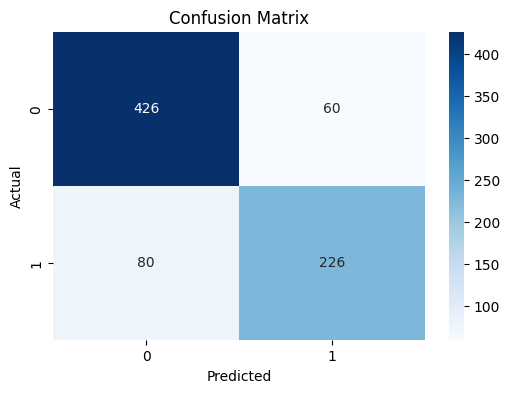

In [51]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()